In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest,chi2,f_classif
from sklearn.metrics import confusion_matrix,accuracy_score,auc,roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

### Data Description

1. battery_power: Total energy a battery can store in one time measured in mAh
2. blue: Has bluetooth or not
3. clock_speed: speed at which microprocessor executes instructions
4. dual_sim: Has dual sim support or not
5. fc: Front Camera mega pixels
6. four_g: Has 4G or not
7. int_memory: Internal Memory in Gigabytes
8. m_dep: Mobile Depth in cm
9. mobile_wt: Weight of mobile phone
10. n_cores: Number of cores of processor
11. pc: Primary Camera mega pixels
12. px_height: Pixel Resolution Height
13. px_width: Pixel Resolution Width
14. ram: Random Access Memory in Mega Bytes
15. sc_h: Screen Height of mobile in cm
16. sc_w: Screen Width of mobile in cm
17. talk_time: longest time that a single battery charge will last when you are
18. three_g: Has 3G or not
19. touch_screen: Has touch screen or not
20. wifi: Has wifi or not
21. price_range: Target Variable, This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

## 1. Reading the Data

In [2]:
df = pd.read_csv("train.csv")

## 2. Data Head

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Dataset is already in a coded format we don't need to perform the coding for categorical features.

## 3. Describe data

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## Null Values 

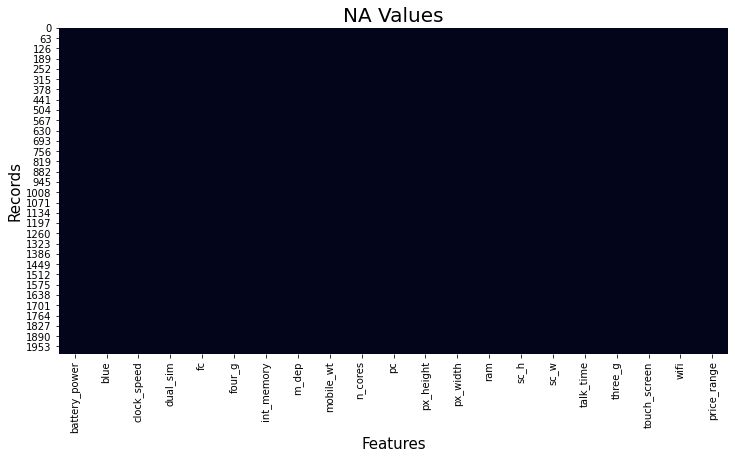

In [6]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(),cbar=False)
plt.title("NA Values",fontsize=20)
plt.xlabel("Features",fontsize=15)
plt.ylabel("Records",fontsize = 15)
plt.show()

There is no NA values in the dataframe.

## Data Balanced

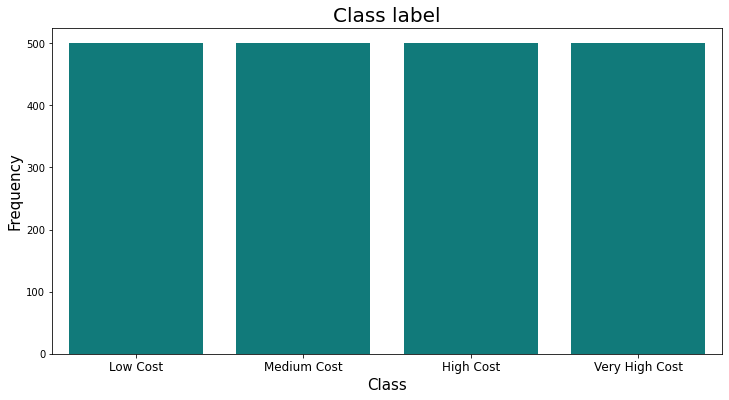

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(df.price_range,color='darkcyan')
plt.title("Class label",fontsize=20)
plt.xlabel("Class",fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.xticks([0,1,2,3],['Low Cost', 'Medium Cost', 'High Cost','Very High Cost'],fontsize = 12)
plt.show()

Data is balanced for all the class.

## Correlation Plot

In [8]:
df_cor = df.corr('spearman')

In [9]:
mask=np.triu(np.ones(df_cor.shape)).astype(np.bool)

Text(0.5, 1.0, 'Correlation Matrix')

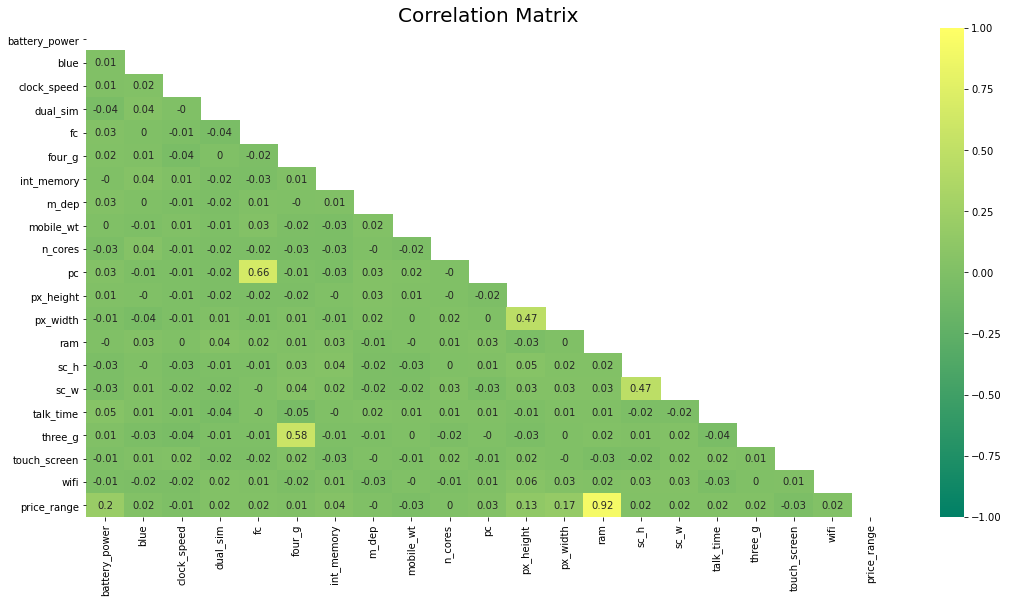

In [10]:
plt.figure(figsize=(18,9))
sns.heatmap(round(df_cor,2),annot=True,mask=mask,vmin=-1, vmax=1,cmap = 'summer')
plt.title("Correlation Matrix",fontsize = 20)

There is no correlation in the features where as ram is the only feature which is highly correlated with the price range to insure that we will perform the chi-square test for feature selection for categorical features and to test the independency.

## Distribution Clock speed for each price range

<AxesSubplot:xlabel='clock_speed', ylabel='Density'>

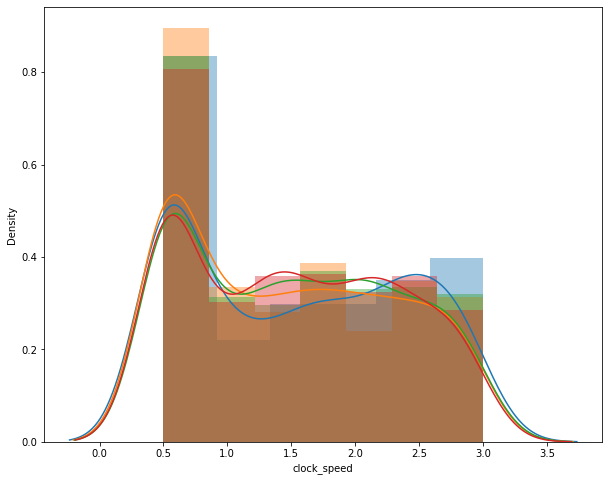

In [11]:
plt.figure(figsize = (10,8))
sns.distplot(df.loc[df["price_range"] == 0]["clock_speed"])
sns.distplot(df.loc[df["price_range"] == 1]["clock_speed"])
sns.distplot(df.loc[df["price_range"] == 2]["clock_speed"])
sns.distplot(df.loc[df["price_range"] == 3]["clock_speed"])

#from the histogram the interpretation is a)each of the groups looks to be normal b) between the group variance looks to be quite less therefore ANOVA is the right tool

Clock speed is not a normally distributed for all the classes we have, where as the variability is very less seems here.

## Distributing in Dependent and Independent variables.

In [12]:
X = df.drop('price_range',axis=1)
y= df.price_range

## Feature Scaling

In [13]:
sc = StandardScaler()

x = sc.fit_transform(X)

Scaling the feature by using Standard scaler. which scale the feature where mean of the feature is about to 0 and standard deviation is 1.

## Data Split.

In [14]:
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.33, random_state=42)

Splitting data in the training and testing in the ratio of 77:33.

## Modelling on default features

In [15]:
dt_model = DecisionTreeClassifier()

In [16]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [17]:
y_pred = dt_model.predict(X_test) # Predicting the x test 

In [18]:

print('Training set score: {:.4f}'.format(dt_model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dt_model.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.8197


Training score is 1% and where as testing score is 82 % which shows that the model is in overfit condition, will handle this in further procedure.

In [19]:
class_names = ['Low cost','Medium cost','High cost','Very High cost']

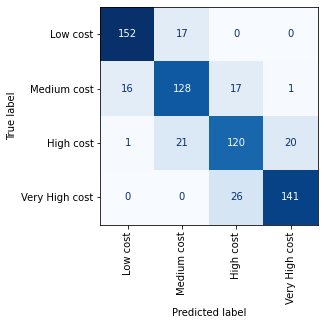

In [20]:
disp = plot_confusion_matrix(dt_model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,xticks_rotation='vertical',colorbar=False)
plt.show()

#### Null Accuracy for each class

In [21]:
for i in range(4):
    print(f"Null accuracy for class {i} is {round(y_test.value_counts()[y_test.value_counts().index!=i].sum()/y_test.value_counts().sum(),2)}")

Null accuracy for class 0 is 0.74
Null accuracy for class 1 is 0.75
Null accuracy for class 2 is 0.75
Null accuracy for class 3 is 0.75


Where as our model accuracy is 82% on testing set out of this null accuracy are an average of 75% for each category. I have calculate the accuracy for each class in below.

## All Features model performance

In [53]:
cnf_matrix =  confusion_matrix(y_test,y_pred)

In [54]:
def classes(class_label=0,cnf_matrix = confusion_matrix(y_test,y_pred)):
    FP = (cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)).astype(float)
    FN = (cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)).astype(float)
    TP = np.diag(cnf_matrix).astype(float)
    TN = (cnf_matrix.sum() - (FP + FN + TP)).astype(float)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)
    # Overall accuracy for each class
    ACC = (TP+TN)/(TP+FP+FN+TN)
    
    #Null accuracy
    null_acc = round((y_test.value_counts()[y_test.value_counts().index!=class_label].sum()/y_test.value_counts().sum())*100,2)
    
    
    print(f"False Positive for {class_label} are {FP[class_label]}",'\n\n',
          f"False Negative for {class_label} are {FN[class_label]}",'\n\n',
          f"True Positive for {class_label} are {TP[class_label]}",'\n\n',
          f"True Negative for {class_label} are {TN[class_label]}",'\n\n',
          f"Sensitivity for {class_label} are {TPR[class_label]}",'\n\n',
          f"Specificity for {class_label} are {TNR[class_label]}",'\n\n',
          f"Precision for {class_label} are {PPV[class_label]}",'\n\n',
          f"Negative predictive value for {class_label} are {NPV[class_label]}",'\n\n',
          f"false positive rate for {class_label} are {FPR[class_label]}",'\n\n',
          f"False negative rate for {class_label} are {FNR[class_label]}",'\n\n',
          f"False discovery rate for {class_label} are {FDR[class_label]}",'\n\n',
          f"Overall accuracy for {class_label} are {ACC[class_label]}",'\n\n',
          f"Null accuracy for {class_label} are {null_acc}",'\n\n',
          
          "==================================================================="   
          
         )

In [55]:
classes(1)

False Positive for 1 are 40.0 

 False Negative for 1 are 31.0 

 True Positive for 1 are 131.0 

 True Negative for 1 are 458.0 

 Sensitivity for 1 are 0.808641975308642 

 Specificity for 1 are 0.9196787148594378 

 Precision for 1 are 0.7660818713450293 

 Negative predictive value for 1 are 0.9366053169734151 

 false positive rate for 1 are 0.08032128514056225 

 False negative rate for 1 are 0.19135802469135801 

 False discovery rate for 1 are 0.23391812865497075 

 Overall accuracy for 1 are 0.8924242424242425 

 Null accuracy for 1 are 75.45 



## Modeling after Feature selection using anova test.

In [56]:
X = df.drop('price_range',axis=1)
y= df.price_range

In [57]:
sc = StandardScaler()
x = sc.fit_transform(X)

Selecting top 10 features out of the 20 features by using anova test or f_classifier.

In [58]:
fvalue_Best = SelectKBest(f_classif, k=10)
X_kbest = fvalue_Best.fit_transform(x, y)

In [59]:
temp = pd.Series(fvalue_Best.scores_)
temp.index = X.columns
temp.sort_values(ascending=True,inplace=True)

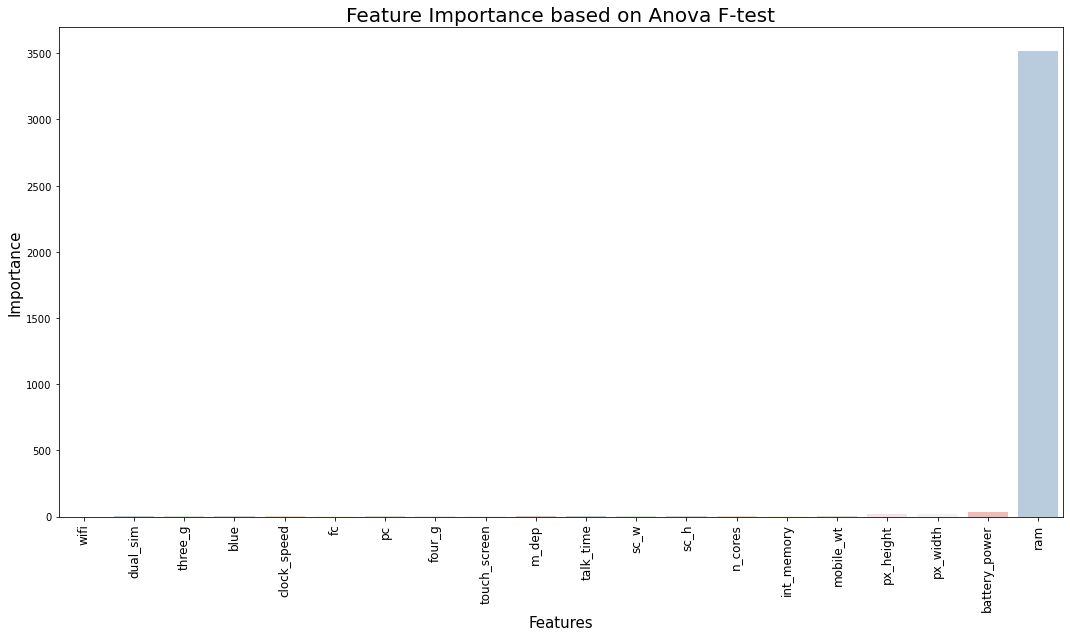

In [60]:
plt.figure(figsize=(18,9))
sns.barplot(x = temp.index , y = temp.values,palette='Pastel1')
plt.title("Feature Importance based on Anova F-test",fontsize=20)
plt.xlabel("Features",fontsize=15)
plt.ylabel("Importance",fontsize=15)
plt.xticks(fontsize=12,rotation=90)
plt.show()

Only RAM, Battery power, px_height, mobile weights are showing higher significance for the feature selection will select the top 15 features based on their performance.

## Data Split.

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X_kbest, y, test_size=0.33, random_state=42)

## Modelling on Selected features

In [62]:
dt_model_2 = DecisionTreeClassifier(min_samples_split=165,max_depth=5,random_state=42)

dt_model_2.fit(X_train,y_train)

y_pred = dt_model_2.predict(X_test)


print('Training set score: {:.4f}'.format(dt_model_2.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dt_model_2.score(X_test, y_test)))

Training set score: 0.7888
Test set score: 0.7576


Here We have the good fit model where my training and testing accuracy are quite similar, to increase the efficiency will try the Hyperparameter tunning by using Gridsearch CV in further.

In [63]:
class_names = ['Low cost','Medium cost','High cost','Very High cost']

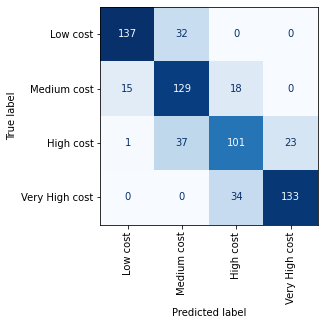

In [64]:
disp = plot_confusion_matrix(dt_model_2, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,xticks_rotation='vertical',colorbar=False)
plt.show()

## Performance for Selected Features All Classes

In [65]:
cnf_matrix =  confusion_matrix(y_test,y_pred)

In [66]:
classes(0)

False Positive for 0 are 17.0 

 False Negative for 0 are 20.0 

 True Positive for 0 are 149.0 

 True Negative for 0 are 474.0 

 Sensitivity for 0 are 0.8816568047337278 

 Specificity for 0 are 0.9653767820773931 

 Precision for 0 are 0.8975903614457831 

 Negative predictive value for 0 are 0.9595141700404858 

 false positive rate for 0 are 0.034623217922606926 

 False negative rate for 0 are 0.11834319526627218 

 False discovery rate for 0 are 0.10240963855421686 

 Overall accuracy for 0 are 0.943939393939394 

 Null accuracy for 0 are 74.39 



## Hyper parameter tunning

In [67]:
dt_model_3 = DecisionTreeClassifier(random_state=42)

Using Grid search cv for tunning the parameters of Logistic Regression.

The parameters which we are using is L1 and L2 for penalty and the C , and solver.

In [68]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}



grid_search = GridSearchCV(estimator=dt_model_3, 
                           param_grid=params, 
                           cv=10, n_jobs=-1, verbose=1, scoring = "accuracy")


grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [69]:
dt_best = grid_search.best_estimator_

Storing the Best Estimators and will use the best estimator to predict.

In [70]:
dt_best.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       random_state=42)

In [71]:
y_pred = dt_best.predict(X_test)

In [72]:
print('Training set score: {:.4f}'.format(dt_best.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dt_best.score(X_test, y_test)))

Training set score: 0.9515
Test set score: 0.8394


Without hyper parameter we have accuracy of training is 95 % where as testing accuracy is 83 % which also leads to some kind of overfitting.

# Conclusion:


1. Data is appropriately distributed in the categories.
2. Using Hyper parameter in the selected features are not performing up to the mark we should go for the selected features without tunning the parameters.
3. Model is performing really well with all the features and with the top selected features with the accuracy of more than 95%.
4. Tried to fit the model without scalling the features which was giving the poor accuracy of somewhere around 66%.

5. I would selet the log_model_2 for the further predictions.